MinMax Scaling  
yi = a + ((xi-xmin)(b-a) / (xmax-xmin))  
  
Mean Normalization (for centered data)  
yi = (xi - mean(x)) \ (xmax - xmin)

MaxAbs Scaling (for sparse data)  
yi = xi / abs(xmax)

Robust Scaling (robust to outliers)  
yi = (xi - median(x)) / IQR

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
df = pd.read_csv('../datasets/wine.csv', usecols=[0,1,2])
df.sample(3)

,Wine,Alcohol,Malic.acid
172,3,14.16,2.51
63,2,12.37,1.13
19,1,13.64,3.10


<Axes: xlabel='Alcohol', ylabel='Density'>

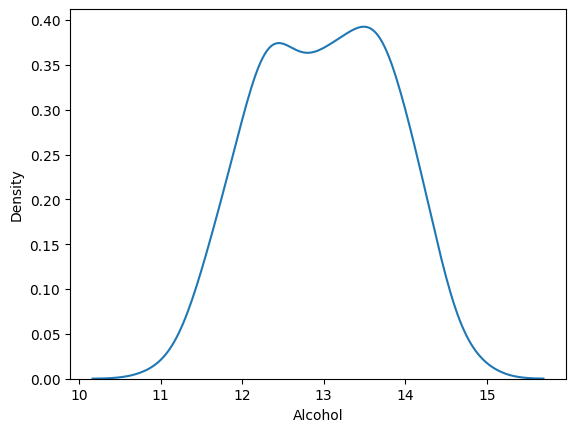

In [10]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic.acid', ylabel='Density'>

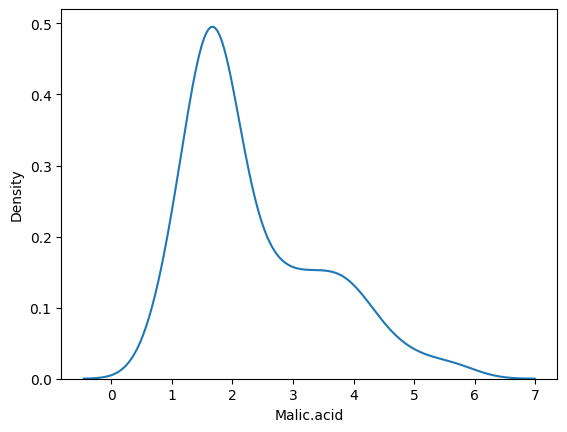

In [11]:
sns.kdeplot(df['Malic.acid'])

<Axes: xlabel='Alcohol', ylabel='Malic.acid'>

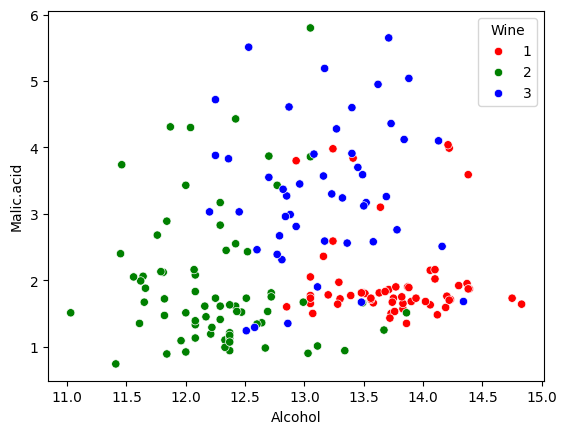

In [13]:
color_dict = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(x='Alcohol', y='Malic.acid', data=df, hue=df['Wine'], palette=color_dict)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Wine', axis=1), df['Wine'], test_size=0.25, random_state=99)
x_train.shape, x_test.shape

((133, 2), (45, 2))

In [17]:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [28]:
np.round(x_train.describe(), 1)

,Alcohol,Malic.acid
count,133.0,133.0
mean,13.0,2.4
std,0.8,1.2
min,11.4,0.7
25%,12.3,1.6
50%,13.0,1.9
75%,13.7,3.0
max,14.8,5.8


In [29]:
np.round(x_train_scaled.describe(), 1)

,Alcohol,Malic.acid
count,133.0,133.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


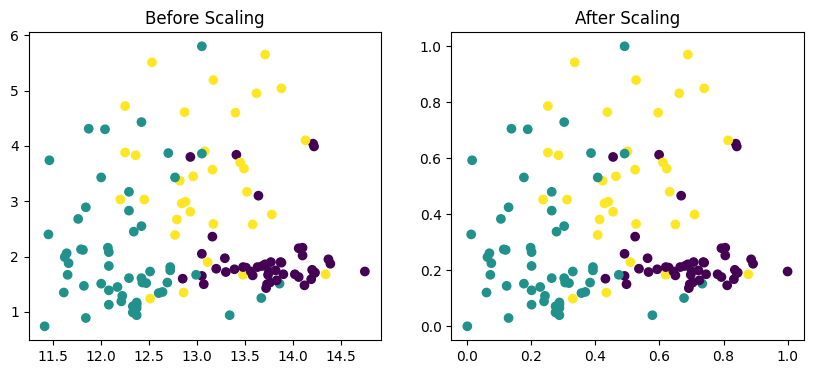

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))

ax1.scatter(x_train['Alcohol'], x_train['Malic.acid'], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Alcohol'], x_train_scaled['Malic.acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()